In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [13]:
data = datasets.load_diabetes()
print(diabetes_X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [14]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [28]:
for i in range(len(data.feature_names)):
    print(data.feature_names[i])
    print(data.data[i])


age
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
sex
[-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
  0.07441156 -0.03949338 -0.06832974 -0.09220405]
bmi
[ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
 -0.03235593 -0.00259226  0.00286377 -0.02593034]
bp
[-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
 -0.03603757  0.03430886  0.02269202 -0.00936191]
s1
[ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
  0.00814208 -0.00259226 -0.03199144 -0.04664087]
s2
[-0.09269548 -0.04464164 -0.04069594 -0.01944209 -0.06899065 -0.07928784
  0.04127682 -0.0763945  -0.04118039 -0.09634616]
s3
[-0.04547248  0.05068012 -0.04716281 -0.01599922 -0.04009564 -0.02480001
  0.00077881 -0.03949338 -0.06291295 -0.03835666]
s4
[ 0.06350368  0.05068012 -0.00189471  0.06662967  0.09061988  0.10891438
  0.02286863  0.01770335 -0.03581673  0

In [17]:
data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [29]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# Taken from: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py

In [30]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

feature_names = diabetes.feature_names
print(feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [31]:
clf = LassoCV().fit(X, y)
importance = np.abs(clf.coef_)
print(importance)

[  0.         226.2375274  526.85738059 314.44026013 196.92164002
   1.48742026 151.78054083 106.52846989 530.58541123  64.50588257]


In [32]:
idx_third = importance.argsort()[-3]
threshold = importance[idx_third] + 0.01

idx_features = (-importance).argsort()[:2]
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

sfm = SelectFromModel(clf, threshold=threshold)
sfm.fit(X, y)
X_transform = sfm.transform(X)

n_features = sfm.transform(X).shape[1]

Selected features: ['s5' 'bmi']


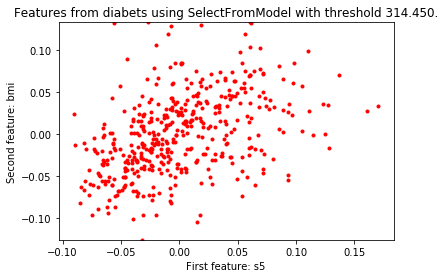

In [33]:
plt.title(
    "Features from diabets using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("First feature: {}".format(name_features[0]))
plt.ylabel("Second feature: {}".format(name_features[1]))
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

age
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]


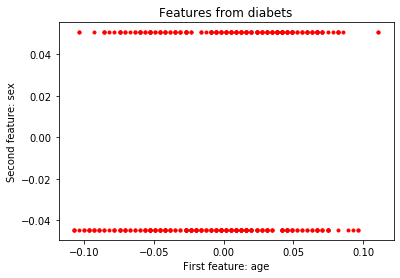

sex
[-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
  0.07441156 -0.03949338 -0.06832974 -0.09220405]


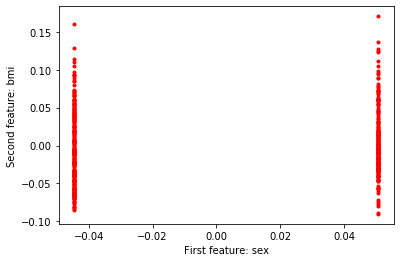

bmi
[ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
 -0.03235593 -0.00259226  0.00286377 -0.02593034]


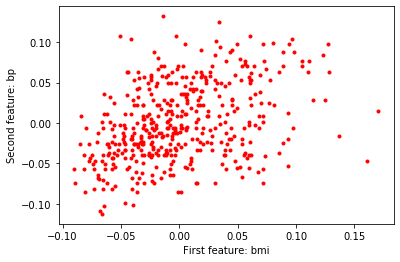

bp
[-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
 -0.03603757  0.03430886  0.02269202 -0.00936191]


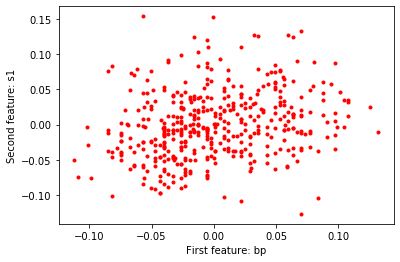

s1
[ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
  0.00814208 -0.00259226 -0.03199144 -0.04664087]


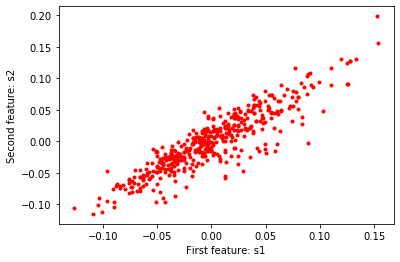

s2
[-0.09269548 -0.04464164 -0.04069594 -0.01944209 -0.06899065 -0.07928784
  0.04127682 -0.0763945  -0.04118039 -0.09634616]


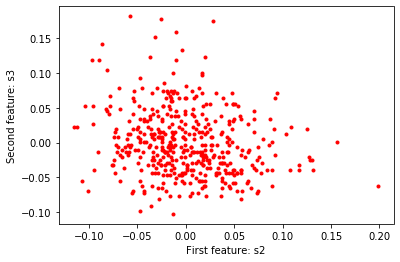

s3
[-0.04547248  0.05068012 -0.04716281 -0.01599922 -0.04009564 -0.02480001
  0.00077881 -0.03949338 -0.06291295 -0.03835666]


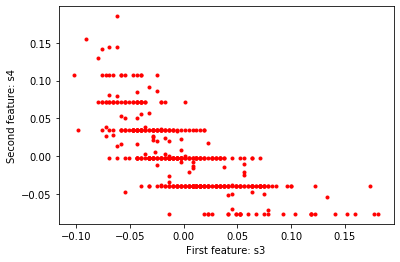

s4
[ 0.06350368  0.05068012 -0.00189471  0.06662967  0.09061988  0.10891438
  0.02286863  0.01770335 -0.03581673  0.00306441]


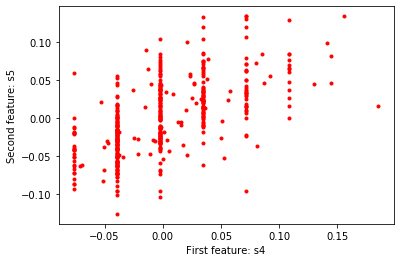

s5
[ 0.04170844  0.05068012  0.06169621 -0.04009932 -0.01395254  0.00620169
 -0.02867429 -0.00259226 -0.01495648  0.01134862]


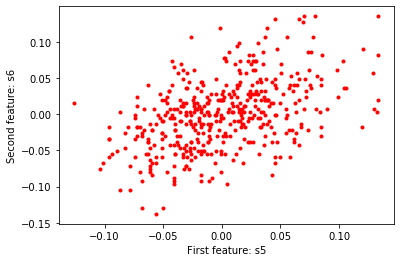

s6
[-0.07090025 -0.04464164  0.03906215 -0.03321358 -0.01257658 -0.03450761
 -0.02499266 -0.00259226  0.06773633 -0.01350402]


IndexError: index 10 is out of bounds for axis 1 with size 10

In [56]:
plt.title("Features from diabets")
for i in range(len(data.feature_names)):
    print(data.feature_names[i])
    print(data.data[i])
    plt.plot(data.data[:, i], data.data[:, i+1], 'r.')
    plt.xlabel("First feature: {}".format(data.feature_names[i]))
    plt.ylabel("Second feature: {}".format(data.feature_names[i+1]))
    #plt.ylim([data.data[i], np.max(feature2)])
    plt.show()

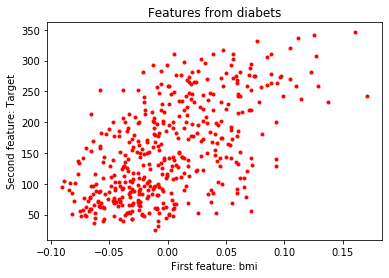

In [55]:
plt.title("Features from diabets")

plt.plot(data.data[:, 2], data.target, 'r.')
plt.xlabel("First feature: {}".format(data.feature_names[2]))
plt.ylabel("Second feature: Target")

#plt.ylim([data.data[i], np.max(feature2)])
plt.show()

In [57]:
data.data[:, 2].shape

(442,)

In [50]:
data.shape

AttributeError: shape